In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('..\data\cleaned\data_cleaned.csv')

In [3]:
df.head()

,Country,Theft,Fraud,Drugs,Burglary,Serious assault,Sexual violence,Robbery,Acts against computer systems,Corruption,Sexual exploitation,Money laundering,Attempted intentional homicide,Participation in an organized criminal group,Intentional homicide,Kidnapping,Total Crimes,Unemployment Rate,GDP
0,Sweden,2784.26,2701.06,1158.39,703.48,46.37,217.72,70.34,111.43,205.03,59.75,90.08,9.57,0.00,1.09,0.00,8158.57,6.5,6.368562e+11
1,Denmark,2134.02,925.06,490.85,521.11,32.26,108.61,22.04,0.00,81.80,36.39,20.33,2.28,0.00,0.72,0.00,4375.47,3.6,3.983033e+11
2,Finland,2242.66,853.02,505.80,114.66,30.05,90.64,34.19,35.64,66.86,13.82,10.75,6.76,0.05,1.70,0.04,4006.64,5.2,2.963876e+11
3,Belgium,1428.70,811.55,480.49,392.89,502.93,84.37,99.05,73.64,40.73,24.35,47.94,8.94,4.23,1.26,0.00,4001.07,3.8,5.943520e+11
4,France,1786.35,345.47,426.74,398.23,522.86,109.71,82.96,23.70,4.04,18.38,2.82,5.03,3.21,1.08,0.00,3730.58,4.9,2.957880e+12


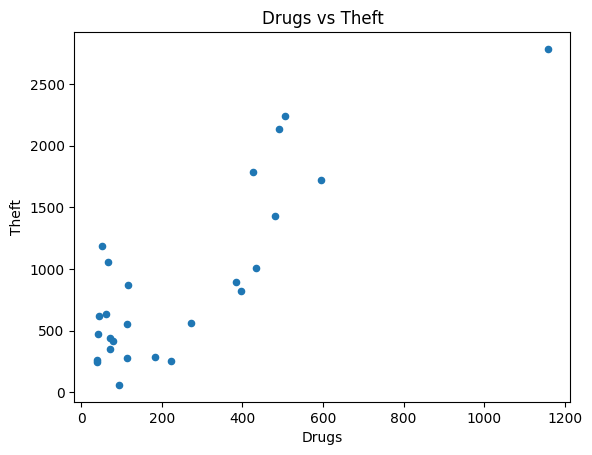

In [4]:
create_scatterplot('Drugs', 'Theft')

In [5]:
# Summary 
summary_stats = df[['Drugs', 'Theft']].describe()

# Print summary statistics
print(summary_stats)


             Drugs        Theft
count    26.000000    26.000000
mean    251.716923   898.191154
std     259.964407   714.476794
min      38.640000    58.820000
25%      67.292500   369.280000
50%     114.665000   627.890000
75%     419.300000  1150.805000
max    1158.390000  2784.260000


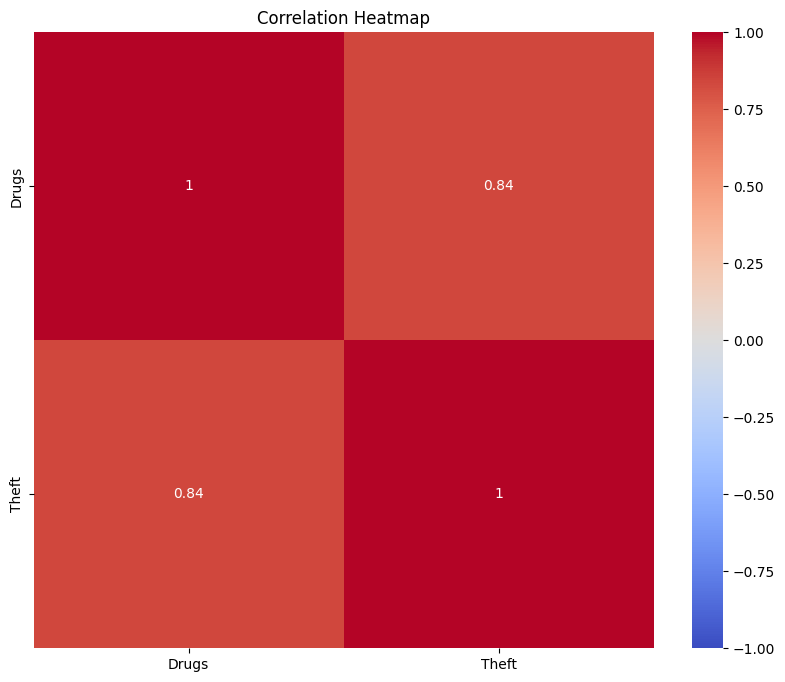

In [6]:
create_collinearity('Drugs', 'Theft')

In [8]:
#regression model
# Define the dependent variable and independent variables
y = df['Theft']
X = df[['Drugs']]

# Add a constant column to the independent variables
X = sm.add_constant(X)

# Create the regression model
model = sm.OLS(y, X)

# Fit the regression model
results = model.fit()

# Get the regression coefficients, p-values, standard errors, and other relevant statistics
coefficients = results.params
p_values = results.pvalues
standard_errors = results.bse

# Assess the goodness-of-fit of the regression model
r_squared = results.rsquared
adjusted_r_squared = results.rsquared_adj
f_statistic = results.fvalue


In [9]:
print("Regression Coefficients:")
print(coefficients)
print("P-values:")
print(p_values)
print("Standard Errors:")
print(standard_errors)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adjusted_r_squared)
print("F-statistic:", f_statistic)

Regression Coefficients:
const    318.869357
Drugs      2.301481
dtype: float64
P-values:
const    7.811260e-03
Drugs    9.580499e-08
dtype: float64
Standard Errors:
const    109.854351
Drugs      0.306641
dtype: float64
R-squared: 0.7012396047802438
Adjusted R-squared: 0.6887912549794206
F-statistic: 56.33193282645969


In [ ]:
    Regression Coefficients:
        The coefficient for the constant term ('const') is approximately 318.869357.
        The coefficient for the variable 'Drugs' is approximately 2.301481.

    P-values:
        The p-value for the constant term ('const') is 0.00781126, which is smaller than the typical significance level of 0.05. This suggests that the constant term is statistically significant in the model.
        The p-value for the variable 'Drugs' is 9.580499e-08, indicating that it is statistically significant.

    Standard Errors:
        The standard error for the constant term ('const') is approximately 109.854351.
        The standard error for the variable 'Drugs' is approximately 0.306641.

    R-squared: The R-squared value is 0.7012396047802438, indicating that approximately 70.12% of the variance in the dependent variable is explained by the independent variable 'Drugs'. This suggests a moderately strong relationship between 'Drugs' and the dependent variable.

    Adjusted R-squared: The adjusted R-squared value is 0.6887912549794206. It adjusts the R-squared value based on the number of predictors in the model. In this case, the adjusted R-squared value is slightly lower than the R-squared value, suggesting that the inclusion of 'Drugs' may not contribute much to the explanation of the dependent variable.

    F-statistic: The F-statistic is 56.33193282645969, which tests the overall significance of the regression model. In this case, the F-statistic is relatively high, indicating that the model is statistically significant.

In [ ]:
# histogram
df[['GDP', 'Unemployment Rate']].hist(bins=10)
plt.tight_layout()
plt.show()    